# Estimating Economic Growth using Deep Learning

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers, callbacks

In [2]:
data = pd.read_csv('data_final.csv')
data

,foreign_direct_investment,gross_savings,unemployment,labor_force,mortality_rate,new_businesses_registered,education_expenditure,age_dependency_ratio,food_production_index,human_capital_index,...,tobacco_use,profit_tax,population,literacy_rate,birth_rate,death_rate,migration,agriculture_forestry_fishing,industry,gdp_per_capita
0,1.739573e+08,8.462438e+10,8.438023,5573458.0,120.4,28735.5,1.164406e+10,103.671183,95.55,0.593303,...,25.092807,16.66987,22600770.0,78.922721,46.901,11.048,744193.000000,1.566430e+09,9.655434e+08,179.426611
1,1.739573e+08,8.462438e+10,8.438023,5886907.0,116.3,28735.5,1.164406e+10,102.663238,98.77,0.593303,...,25.092807,16.66987,23680871.0,78.922721,46.231,10.704,-440402.018359,1.689670e+09,1.025522e+09,190.683814
2,1.739573e+08,8.462438e+10,8.438023,6198355.0,112.1,28735.5,1.164406e+10,101.562371,96.05,0.593303,...,25.092807,16.66987,24726684.0,78.922721,45.507,10.356,-440402.018359,1.553454e+09,1.370816e+09,211.382117
3,1.739573e+08,8.462438e+10,8.438023,6483460.0,107.9,28735.5,1.164406e+10,100.349127,106.32,0.593303,...,25.092807,0.00000,25654277.0,78.922721,44.723,10.003,-440402.018359,1.931964e+09,1.664800e+09,242.031285
4,1.739573e+08,8.462438e+10,8.438023,6644359.0,103.7,28735.5,1.164406e+10,100.970943,97.63,0.593303,...,25.092807,0.00000,26433049.0,78.922721,43.870,9.645,-440402.018359,1.996295e+09,1.966653e+09,263.733692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,-3.443000e+08,-3.479166e+08,5.370000,6194591.0,81.4,8541.0,2.311408e+08,81.230012,88.43,0.593303,...,25.092807,20.00000,12894316.0,83.582710,36.526,12.384,-440402.018359,1.222053e+09,3.062978e+09,1093.654002
4960,-3.498500e+08,-2.406172e+09,8.438023,6285545.0,73.8,9491.0,2.846143e+08,81.775797,94.08,0.593303,...,15.200000,19.80000,13115131.0,78.922721,36.292,11.167,-622997.000000,1.376807e+09,4.335296e+09,1304.969802
4961,-3.730500e+08,-9.432642e+08,8.438023,6385796.0,67.8,9782.0,3.287764e+08,82.350264,92.05,0.593303,...,25.092807,19.60000,13350356.0,78.922721,35.768,10.115,-440402.018359,1.363954e+09,4.543589e+09,1430.000818
4962,-4.728000e+08,-5.911380e+08,4.770000,6486791.0,64.4,9465.0,3.369867e+08,82.840045,91.23,0.593303,...,14.700000,17.70000,13586681.0,88.693420,34.978,9.277,-440402.018359,1.704942e+09,4.624054e+09,1434.899340


## Splitting the data into training and validation data

In [3]:
X = data.drop('gdp_per_capita', axis=1)
y = data.gdp_per_capita

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Building the Deep Learning model

In [5]:
input_shape = [X_train.shape[1]]

In [6]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

In [7]:
opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=opt,
    loss='mae',
)

early_stopping = callbacks.EarlyStopping(
    min_delta=0.1,
    patience=20,
    restore_best_weights=True,
)

## Training the model

=======] - 0s 5ms/step - loss: 5531.3637 - val_loss: 5751.7983
Epoch 161/400
32/32 [==============================] - 0s 5ms/step - loss: 5636.1040 - val_loss: 5674.3911
Epoch 162/400
32/32 [==============================] - 0s 5ms/step - loss: 5049.5624 - val_loss: 5768.5659
Epoch 163/400
32/32 [==============================] - 0s 5ms/step - loss: 5329.3120 - val_loss: 5801.8770
Epoch 164/400
32/32 [==============================] - 0s 5ms/step - loss: 5370.3604 - val_loss: 5672.9766
Epoch 165/400
32/32 [==============================] - 0s 5ms/step - loss: 5250.2840 - val_loss: 5593.9658
Epoch 166/400
32/32 [==============================] - 0s 5ms/step - loss: 5290.0391 - val_loss: 5630.2715
Epoch 167/400
32/32 [==============================] - 0s 5ms/step - loss: 5207.7582 - val_loss: 5548.0078
Epoch 168/400
32/32 [==============================] - 0s 5ms/step - loss: 4915.0349 - val_loss: 5547.4082
Epoch 169/400
32/32 [==============================] - 0s 5ms/step - loss: 5086.2

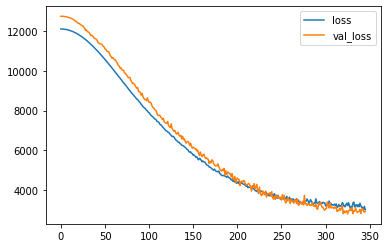

In [8]:
epochs = 400
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    batch_size=128,
    epochs=epochs,
    callbacks=[early_stopping],
    verbose=1,
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

## Testing the model

In [9]:
test_loss = model.evaluate(
    X_test, y_test,
    verbose=0,
)

print('Mean Absolute Error:', test_loss)

Mean Absolute Error: 2207.074951171875
